In [6]:
import cv2
import matplotlib.pyplot as plt
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr



In [31]:
def preprocess_image(image_path):   
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    blurred = cv2.GaussianBlur(binary, (5, 5), 0)


    unsharp_mask = cv2.addWeighted(gray, 2, blurred, -1, 0)

    return unsharp_mask


Using CPU. Note: This module is much faster with a GPU.


[[[[19, 7], [831, 7], [831, 87], [19, 87]], '10 EIS RUE CAID AHMED CHERRADI QUARTIER NAHDA KURIBGA']]


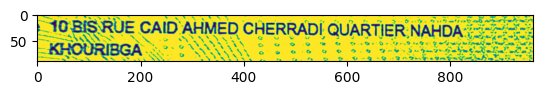

In [34]:

path = r'C:\Users\pc\Desktop\lp BigData\s6\cropped\cropped_2.jpg'


img = preprocess_image(path)
reader = easyocr.Reader(['fr'], gpu=False) 
res = reader.readtext(img, paragraph=True)

plt.imshow(img)
print(res)